In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scipy

In [2]:
path = r'town_1959_2.csv'
data = pd.read_csv(path, encoding = 'cp1251')

In [3]:
data.head()

,номер,город,население
0,1,Москва,5046.0
1,2,Санкт-Петербург,3003.0
2,3,Нижний_Новгород,941.0
3,4,Новосибирск,885.0
4,5,Самара,806.0


In [4]:
def ruleOf3std(series : pd.Series):
    std = series.std()
    mean = series.mean()
    #range = [mean - 3*std, mean + 3*std] # not usable
    mask = series < (std * 3 + mean)
    return series#[mask]

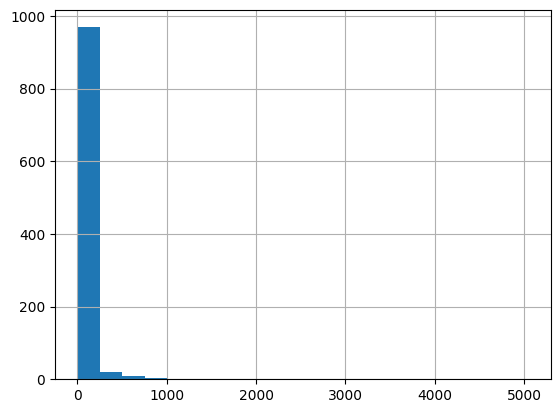

In [5]:
bins = 20
counts, bins = np.histogram(ruleOf3std(data['население']), bins=bins) # ruleOf3std - правило 3 сигм, убирает из вывода переменные, выходящие за рамки правила
plt.hist(bins[:-1], bins, weights=counts)
plt.grid(True)
plt.show()

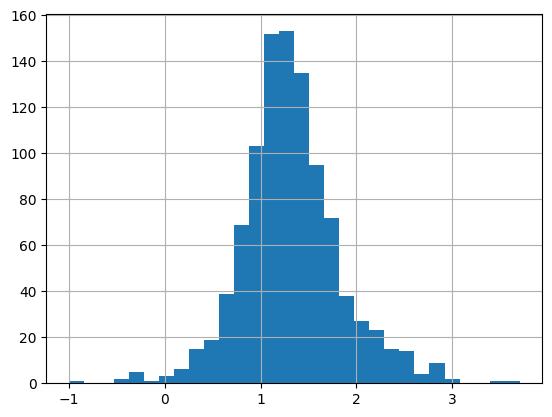

In [10]:
logarithmicData = np.log10(data['население'])
bins = 30
counts, bins = np.histogram(logarithmicData, bins=bins) # ruleOf3std - правило 3 сигм, убирает из вывода переменные, выходящие за рамки правила
plt.hist(bins[:-1], bins, weights=counts)
plt.grid(True)
plt.show()

In [11]:
logarithmicData.describe()

count    1004.000000
mean        1.319556
std         0.515877
min        -1.000000
25%         1.029384
50%         1.284429
75%         1.579495
max         3.702947
Name: население, dtype: float64

In [12]:
scipy.stats.shapiro((data['население']))

ShapiroResult(statistic=0.16436320543289185, pvalue=0.0)

In [13]:
scipy.stats.shapiro(logarithmicData)

ShapiroResult(statistic=0.9746663570404053, pvalue=3.1486824866172602e-12)